# Salary predictor

Original dataset from: https://www.kaggle.com/datasets/johnolafenwa/us-census-data/versions/1?resource=download

**Problema de negócio**: Predizer o salário anual (se maior ou menor que 50k) baseado nos dados coletados

**Storytelling** : Uma multinacional quer reestruturar o plano de carreira e de salário (anual) dos seus colaboradores. Sabe-se que o valor salarial tem uma correlação diretamente proporcional ao nível escolar, hard skills e atualmente, conta também com a soft skills.


## Conhecendo os dados

In [1]:
#importando as bibliotecas necessárias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
#Carregando os arquivos de treino e de teste

df_treino = pd.read_csv('adult-training.csv', header= None)


print(f'O dataset de treino contém  ', df_treino.shape, '(linhas x colunas)')


O dataset de treino contém   (32561, 15) (linhas x colunas)


### Explorando o df_treino

In [3]:
df_treino.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [4]:
#Criando nome dos atributos:
df_treino.rename(columns= {0:'age',
                           1: 'work_class',
                           2:'fnlwgt',
                           3:'education', 
                           4:'education_num', 
                           5:'marital_status', 
                           6:'occupation',
                           7:'relationship',
                           8:'race',
                           9:'sex',
                           10:'capital_gain',
                           11:'capital_loss',
                           12:'hours_per_week',
                           13:'native_country',
                           14:'annual_income'},
                           inplace=True)

### Explorando o df_teste

In [5]:
df_teste= pd.read_csv('adult-test.csv',  header= None)

print(f'O dataset de teste contém  ', df_teste.shape, '(linhas x colunas)')

O dataset de teste contém   (16281, 15) (linhas x colunas)


In [6]:
df_teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       16281 non-null  int64 
 1   1       16281 non-null  object
 2   2       16281 non-null  int64 
 3   3       16281 non-null  object
 4   4       16281 non-null  int64 
 5   5       16281 non-null  object
 6   6       16281 non-null  object
 7   7       16281 non-null  object
 8   8       16281 non-null  object
 9   9       16281 non-null  object
 10  10      16281 non-null  int64 
 11  11      16281 non-null  int64 
 12  12      16281 non-null  int64 
 13  13      16281 non-null  object
 14  14      16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [7]:
df_teste.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.


In [8]:
#Criando nome dos atributos:
df_teste.rename(columns= {0:'age',
                           1: 'work_class',
                           2:'fnlwgt',
                           3:'education', 
                           4:'education_num', 
                           5:'marital_status', 
                           6:'occupation',
                           7:'relationship',
                           8:'race',
                           9:'sex',
                           10:'capital_gain',
                           11:'capital_loss',
                           12:'hours_per_week',
                           13:'native_country',
                           14:'annual_income'},
                           inplace=True)

In [ ]:
df_teste.sample(2)

In [9]:
#juntando os dois datasets
df_m = pd.merge(df_treino, df_teste, how="outer")
df_m.sample(2)

,age,work_class,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,annual_income
32300,49,Private,242987,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,Columbia,<=50K
30034,40,Local-gov,303212,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,>50K


In [ ]:
df_m.shape

In [ ]:
# salvando o dataset por segurança
df_m.to_csv('salary.csv', index=False)

In [10]:
#lendo o novo dataset
df_s= pd.read_csv('salary.csv')
df_s.head()

,age,work_class,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [11]:
#Trocando ' ?' por valores NaN
df_s.replace(' ?', np.nan, inplace=True)
df_s.isnull().sum()

age                  0
work_class        2799
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     857
annual_income        0
dtype: int64

In [ ]:
#preenchendo os valores nulos com os mais próximos
#df_s.fillna(method='bfill', inplace=True)
#df_s.isnull().sum()

#### Drawing some plots

In [ ]:
sns.heatmap(df_treino.corr(), cbar=True, lw=0.5) #lw = linewidth

In [ ]:
sns.set_style("whitegrid")
g = sns.catplot(y="occupation", data=df_s, kind="count", palette="Reds_r", height=7, aspect=1.5)
g.ax.set_title("occupation",fontdict={'size':16})
g.ax.xaxis.set_label_text("contagem",fontdict= {'size':12})
g.ax.yaxis.set_label_text("occupation",fontdict= {'size':12})
plt.show()


In [ ]:
sns.set_style("whitegrid")
g = sns.catplot(y="work_class", data=df_s, kind="count", palette="Reds_r", height=7, aspect=1.5)
g.ax.set_title("workclass",fontdict={'size':16})
g.ax.xaxis.set_label_text("contagem",fontdict= {'size':12})
g.ax.yaxis.set_label_text("workclass",fontdict= {'size':12})
plt.show()

In [ ]:
sns.set_style("whitegrid")
g = sns.catplot(y="marital_status", data=df_s, kind="count", palette="Reds_r", height=7, aspect=1.5)
g.ax.set_title("marital_status",fontdict={'size':16})
g.ax.xaxis.set_label_text("contagem",fontdict= {'size':12})
g.ax.yaxis.set_label_text("marital_status",fontdict= {'size':12})
plt.show()

In [ ]:
sns.set_style("whitegrid")
g = sns.catplot(y="relationship", data=df_s, kind="count", palette="Reds_r", height=7, aspect=1.5)
g.ax.set_title("relationship",fontdict={'size':16})
g.ax.xaxis.set_label_text("contagem",fontdict= {'size':12})
g.ax.yaxis.set_label_text("relationship",fontdict= {'size':12})
plt.show()

In [ ]:
sns.set_style("whitegrid")
g = sns.catplot(y="race", data=df_s, kind="count", palette="Reds_r", height=7, aspect=1.5)
g.ax.set_title("race",fontdict={'size':16})
g.ax.xaxis.set_label_text("contagem",fontdict= {'size':12})
g.ax.yaxis.set_label_text("race",fontdict= {'size':12})
plt.show()

In [ ]:
sns.set_style("whitegrid")
g = sns.catplot(y="sex", data=df_s, kind="count", palette="Reds_r", height=7, aspect=1.5)
g.ax.set_title("sex",fontdict={'size':16})
g.ax.xaxis.set_label_text("contagem",fontdict= {'size':12})
g.ax.yaxis.set_label_text("sex",fontdict= {'size':12})
plt.show()

In [ ]:
sns.set_style("whitegrid")
g = sns.catplot(y="native_country", data=df_s, kind="count", palette="Reds_r", height=7, aspect=1.5)
g.ax.set_title("native_country",fontdict={'size':16})
g.ax.xaxis.set_label_text("contagem",fontdict= {'size':12})
g.ax.yaxis.set_label_text("native_country",fontdict= {'size':12})
plt.show()

In [ ]:
df_s.hist(figsize=(20,20))

In [ ]:
sns.set_style("white")
classe = sns.catplot(x="annual_income", data=df_s, kind="count", palette="BuPu", height=6, aspect=1.5)

#vamos balancear a classe (testaremos com oversampling e undersampling)

In [ ]:
df_s.replace(' <=50K.', ' <=50K', inplace=True)
df_s.replace(' >50K.', ' >50K', inplace=True)
df_s.annual_income.value_counts()

In [ ]:
sns.set_style("white")
classe = sns.catplot(x="annual_income", data=df_s, kind="count", palette="BuPu", height=6, aspect=1.5)

#vamos balancear a classe (testaremos com oversampling e undersampling)

In [ ]:
sns.pairplot(df_s, hue='annual_income', palette='rocket')

In [ ]:
axs = df_s.plot.area(figsize=(12, 4), subplots=True)

In [ ]:
df_s.head()

## Cuidando das colunas

### Deletando colunas que não vamos utilizar

- fnlwgt são o total de pessoas que se enquadram naquela categoria. Não acho necessário para o modelo preditivo.
- education_num e education são dados iguais.
- capital_gain e capital_loss também são a somatória. Logo, vou deixar os valores em booleanos (0/1)
- São vários países listados. Vamos deixá-los em continentes para melhor visualizar
- cuidar da classe com label encoder

In [ ]:
df_s= df_s.drop(columns=['fnlwgt', 'education_num'])
df_s.sample(2)

In [ ]:
df_s['capital_gain'] = df_s['capital_gain'].apply(lambda x:1 if x>0 else 0)
df_s.capital_gain.value_counts()

In [ ]:
df_s.native_country.unique()

In [ ]:
#Country Groupings
Asia = [" Laos", " Thailand", " Taiwan", " Vietnam", " Japan", " Cambodia", " China", " India", " Philippines", " Hong", " Iran"]
Europe = [" Hungary", " Yugoslavia", " France", " Scotland", " Ireland", " Greece", " Poland", " Portugal", " Italy", " England",
         " Germany", " Holand-Netherlands"]
LatinAmerica = [" Honduras", " Trinadad&Tobago",  " Nicaragua", " Peru", " Ecuador", " Guatemala", " Jamaica", " Columbia", " Haiti",
               " Dominican-Republic", " Cuba", " El-Salvador"]
AmericanTerritories = [" Puerto-Rico", " Outlying-US(Guam-USVI-etc)", " Canada"," United-States"]

In [ ]:
#ConvertCountry: Converts countries into more congregated groups
#Input: the country
#Output: the converted label
def convertCountry(country):
    #If the person is from an Asian country
    if country in Asia:
        return " Asia" #Return the collective Asian category
    
    #If the person is from a European country
    if country in Europe:
        return " Europe" #Return the collective European category
    
    #If the person is from a Latin American country
    if country in LatinAmerica:
        return " LatinAmerica" #Return the collective Latin America category
    
    #If the person is from a US Territory
    if country in AmericanTerritories:
        return " NorthAmerica" #Return United-States, as it is part of the US
    
    #If the country is just listed as south
    if country == " South":
        return "Unknown" #Return unknown because what do you mean "south"?
    
    return country #Return the country if there is nothing to change

df_s["native_country"] = df_s["native_country"].apply(convertCountry) #Convert the countries


In [ ]:
sns.set_style("whitegrid")
g = sns.catplot(y="native_country", data=df_s, kind="count", palette="Reds_r", height=7, aspect=1.5)
g.ax.set_title("native_country",fontdict={'size':16})
g.ax.xaxis.set_label_text("contagem",fontdict= {'size':12})
g.ax.yaxis.set_label_text("native_country",fontdict= {'size':12})
plt.show()

In [ ]:
#Vamos utilizar o Label Encoder para o tratamento da classe... depois que separar o target, farei isso.
#Para a Classe, vou usar o lambda para poder treinar e aprender. Poderia usar o map....
#df_s['annual_income'] = df_s['annual_income'].apply(lambda x: 0 if x == " <=50K" or x == 0 else 1)
#df_s['annual_income'].value_counts()

In [ ]:
df_s.head()

In [ ]:
df_s.to_csv('salary_trat.csv', index=False)

## Pré-processamento dos dados

In [7]:
#importando as bibliotecas necessárias
import pandas as pd
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from imblearn.under_sampling import NearMiss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.metrics import accuracy_score, log_loss
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

In [8]:
#Carregando os dados tratados
df_trat= pd.read_csv('salary_trat.csv')
df_trat.head()

,age,work_class,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,annual_income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,40,NorthAmerica,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,NorthAmerica,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,NorthAmerica,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,NorthAmerica,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,LatinAmerica,<=50K


In [1]:
#instanciando
le = LabelEncoder()
#Utilizando o label encoder
df_trat['work_class'] = le.fit_transform(df_trat['work_class'])
df_trat['education'] = le.fit_transform(df_trat['education'])
df_trat['marital_status'] = le.fit_transform(df_trat['marital_status'])
df_trat['occupation'] = le.fit_transform(df_trat['occupation'])
df_trat['relationship'] = le.fit_transform(df_trat['relationship'])
df_trat['race'] = le.fit_transform(df_trat['race'])
df_trat['sex'] = le.fit_transform(df_trat['sex'])
df_trat['native_country'] = le.fit_transform(df_trat['native_country'])
df_trat['annual_income'] = le.fit_transform(df_trat['annual_income'])

df_trat.head()

NameError: name 'LabelEncoder' is not defined

In [10]:
#Separando os dados em X e y
X = df_trat.drop('annual_income', axis = 1)
y = df_trat['annual_income']

X.shape, y.shape

((48842, 12), (48842,))

<AxesSubplot:xlabel='annual_income', ylabel='count'>

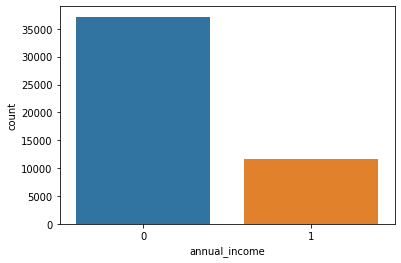

In [11]:
#Verificando o tamanho do y. 
sns.countplot(x=y)
#Vamos utilizar o undersampling para balancear o target do dataset

<AxesSubplot:xlabel='annual_income', ylabel='count'>

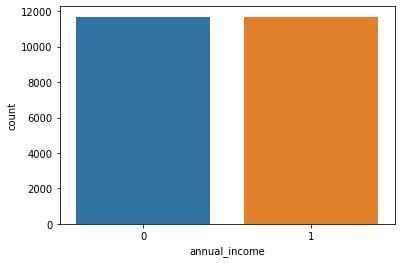

In [12]:
#Instanciando o NearMiss
nr = NearMiss()

#Aplicando
X_under,y_under= nr.fit_resample(X,y)

#checando a amostra
sns.countplot(x=y_under)

In [13]:
# Analisando a importância de cada feature
#instanciando
RF_Class = RandomForestClassifier(random_state=123)
RF_Class.fit(X,y)

#buscando as melhores features
feature_imp = pd.Series(RF_Class.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

age               0.250237
hours_per_week    0.127181
education         0.116283
relationship      0.112212
occupation        0.102631
marital_status    0.087348
capital_gain      0.054535
work_class        0.053882
capital_loss      0.046950
race              0.019632
native_country    0.015218
sex               0.013891
dtype: float64

In [14]:
# Selecionando as features de maior importância.
features_selected = []
for feature,importance in feature_imp.iteritems():
    if importance > 0.03:
        print(f'{feature}: {round(importance * 100)}%')
        features_selected.append(feature)

age: 25%
hours_per_week: 13%
education: 12%
relationship: 11%
occupation: 10%
marital_status: 9%
capital_gain: 5%
work_class: 5%
capital_loss: 5%


### testando com todos as colunas

In [15]:
#Normalizando/padronizando os dados
#https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing

s = StandardScaler()
s.fit(X)
X= s.transform(X)
X


array([[ 0.02599598,  2.5315735 , -0.33254239, ..., -0.2171271 ,
        -0.03408696,  0.25506947],
       [ 0.82830842,  1.65644353, -0.33254239, ..., -0.2171271 ,
        -2.21303208,  0.25506947],
       [-0.04694151, -0.0938164 ,  0.18365954, ..., -0.2171271 ,
        -0.03408696,  0.25506947],
       ...,
       [-0.04694151, -0.0938164 , -0.33254239, ..., -0.2171271 ,
         0.77292975,  0.25506947],
       [ 0.39068346, -0.0938164 , -0.33254239, ..., -0.2171271 ,
        -0.03408696,  0.25506947],
       [-0.26575399,  0.78131357, -0.33254239, ..., -0.2171271 ,
         1.57994645,  0.25506947]])

In [16]:
#Separando os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X ,y)

In [17]:
#Fazendo o primeiro modelo com o KNN
#Instanciando
knn = KNeighborsClassifier(n_neighbors=3)

#treinando
knn.fit(X_train,y_train)

#fazendo a predição do modelo
y_pred = knn.predict(X_test)

In [18]:
print("\n---------------------------\n")
print("Valores Preditos com dados de Teste :\n",y_pred)
print("\n---------------------------\n")
print("Valores Reais com dados de teste :\n",y_test)

#Avaliando o modelo preditivo

# Calculando a Acurácia
from sklearn import metrics
print("Acurácia da Máquina = ", metrics.accuracy_score(y_test, y_pred))

#Comparando Real e Predito com dados de Teste
print("\nReal vs Predito \n------------------------------\n")
error_df = pd.DataFrame({"Real" : y_test,
                         "Predito" : y_pred})

error_df


---------------------------

Valores Preditos com dados de Teste :
 [0 0 1 ... 0 0 0]

---------------------------

Valores Reais com dados de teste :
 37064    0
27468    0
3399     1
15931    1
47659    0
        ..
27661    0
46690    0
26981    1
7513     0
29924    0
Name: annual_income, Length: 12211, dtype: int32
Acurácia da Máquina =  0.8143477192695111

Real vs Predito 
------------------------------



,Real,Predito
37064,0,0
27468,0,0
3399,1,1
15931,1,0
47659,0,1
...,...,...
27661,0,0
46690,0,1
26981,1,0
7513,0,0


In [19]:
#Usando a confusion matrix para avaliar a acurácia e demais indicadores

cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test, y_pred)
print(cm)
print(cr)

[[8203 1077]
 [1190 1741]]
              precision    recall  f1-score   support

           0       0.87      0.88      0.88      9280
           1       0.62      0.59      0.61      2931

    accuracy                           0.81     12211
   macro avg       0.75      0.74      0.74     12211
weighted avg       0.81      0.81      0.81     12211



In [20]:
classifiers = [
    KNeighborsClassifier(3),
    #SVC(kernel="rbf", C=0.025, probability=True),
    #SVC(),
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
]

for classifier in classifiers:
    pipe = Pipeline(steps=[("classifier", classifier)])
    pipe.fit(X_train, y_train)

    print(classifier)
    print("model score: %.3f" % pipe.score(X_test, y_test))
    print("\n---------------------------\n")


KNeighborsClassifier(n_neighbors=3)
model score: 0.814

---------------------------

LogisticRegression()
model score: 0.790

---------------------------

DecisionTreeClassifier()
model score: 0.799

---------------------------

RandomForestClassifier()
model score: 0.834

---------------------------

AdaBoostClassifier()
model score: 0.848

---------------------------

GradientBoostingClassifier()
model score: 0.851

---------------------------



In [21]:
#Testando com o PAC
from sklearn.linear_model import PassiveAggressiveClassifier

#Initialize a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(C=0.5, max_iter=100)
pac.fit(X_train,y_train)

#Predict on the test set and calculate accuracy
y_pred2=pac.predict(X_test)
score=accuracy_score(y_test,y_pred2)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 71.35%


In [38]:
#Vamos tunar o modelo GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0).fit(X_train, y_train)


clf.score(X_test, y_test)

0.8502989108181148

In [23]:
#Vamos tunar o modelo GradientBoostingClassifier
clf2 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.8,
    max_depth=3, random_state=10).fit(X_train, y_train)
clf2.score(X_test, y_test)

0.8553763000573253

In [24]:
y_pred_gbc = clf2.predict(X_test)

In [25]:
print("\n---------------------------\n")
print("Valores Preditos com dados de Teste :\n",y_pred_gbc)
print("\n---------------------------\n")
print("Valores Reais com dados de teste :\n",y_test)

#Avaliando o modelo preditivo

# Calculando a Acurácia
from sklearn import metrics
print("Acurácia da Máquina = ", metrics.accuracy_score(y_test, y_pred_gbc))

#Comparando Real e Predito com dados de Teste
print("\nReal vs Predito \n------------------------------\n")
error_df2 = pd.DataFrame({"Real" : y_test,
                         "Predito" : y_pred_gbc})

error_df2


---------------------------

Valores Preditos com dados de Teste :
 [0 0 1 ... 0 0 0]

---------------------------

Valores Reais com dados de teste :
 37064    0
27468    0
3399     1
15931    1
47659    0
        ..
27661    0
46690    0
26981    1
7513     0
29924    0
Name: annual_income, Length: 12211, dtype: int32
Acurácia da Máquina =  0.8553763000573253

Real vs Predito 
------------------------------



,Real,Predito
37064,0,0
27468,0,0
3399,1,1
15931,1,1
47659,0,1
...,...,...
27661,0,0
46690,0,0
26981,1,0
7513,0,0


In [33]:
cr_gbc = classification_report(y_test, y_pred_gbc)

print(cr_gbc)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      9280
           1       0.73      0.63      0.68      2931

    accuracy                           0.86     12211
   macro avg       0.81      0.78      0.79     12211
weighted avg       0.85      0.86      0.85     12211



### selecionando features

In [26]:
X_f = df_trat[['age', 'hours_per_week', 'education', 'relationship', 'occupation']]
y_f = df_trat['annual_income']

X_f.shape, y_f.shape

((48842, 5), (48842,))

In [27]:
s = StandardScaler()
s.fit(X_f)
X_f= s.transform(X_f)
X_f

array([[ 0.02599598, -0.03408696, -0.33254239, -0.2766849 , -1.48649959],
       [ 0.82830842, -2.21303208, -0.33254239, -0.9008521 , -0.74068955],
       [-0.04694151, -0.03408696,  0.18365954, -0.2766849 , -0.24348286],
       ...,
       [-0.04694151,  0.77292975, -0.33254239, -0.9008521 ,  0.75093053],
       [ 0.39068346, -0.03408696, -0.33254239,  0.97164949, -1.48649959],
       [-0.26575399,  1.57994645, -0.33254239, -0.9008521 , -0.74068955]])

In [28]:
X_f_train, X_f_test, y_f_train, y_f_test = train_test_split(X_f, y_f)

In [29]:
#rodando os modelos
classifiers = [
    KNeighborsClassifier(3),
    #SVC(kernel="rbf", C=0.025, probability=True),
    #SVC(),
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    PassiveAggressiveClassifier(C=0.5, max_iter=100),
]

for classifier in classifiers:
    pipe = Pipeline(steps=[("classifier", classifier)])
    pipe.fit(X_f_train, y_f_train)

    print(classifier)
    print("model score: %.3f" % pipe.score(X_f_test, y_f_test))
    print("\n---------------------------\n")


KNeighborsClassifier(n_neighbors=3)
model score: 0.804

---------------------------

LogisticRegression()
model score: 0.760

---------------------------

DecisionTreeClassifier()
model score: 0.793

---------------------------

RandomForestClassifier()
model score: 0.817

---------------------------

AdaBoostClassifier()
model score: 0.835

---------------------------

GradientBoostingClassifier()
model score: 0.839

---------------------------

PassiveAggressiveClassifier(C=0.5, max_iter=100)
model score: 0.694

---------------------------



In [30]:
#Initialize a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(C=0.5, max_iter=100)
pac.fit(X_train,y_train)

#Predict on the test set and calculate accuracy
y_pred2=pac.predict(X_test)
score=accuracy_score(y_test,y_pred2)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 68.91%


In [31]:
#Vamos tunar o modelo GradientBoostingClassifier
clf3 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.8,
    max_depth=3, random_state=0).fit(X_f_train, y_f_train)
clf3.score(X_f_test, y_f_test)

0.8382605847186962

In [32]:
y_pred_gbc2 = clf3.predict(X_f_test)

print("\n---------------------------\n")
print("Valores Preditos com dados de Teste :\n",y_pred_gbc2)
print("\n---------------------------\n")
print("Valores Reais com dados de teste :\n",y_f_test)

#Avaliando o modelo preditivo

# Calculando a Acurácia
from sklearn import metrics
print("Acurácia da Máquina = ", metrics.accuracy_score(y_f_test, y_pred_gbc2))

#Comparando Real e Predito com dados de Teste
print("\nReal vs Predito \n------------------------------\n")
error_df3 = pd.DataFrame({"Real" : y_f_test,
                         "Predito" : y_pred_gbc2})

error_df3


---------------------------

Valores Preditos com dados de Teste :
 [0 0 0 ... 1 0 0]

---------------------------

Valores Reais com dados de teste :
 2411     0
41614    0
20429    0
30934    1
43989    0
        ..
12983    0
25090    1
25984    0
17616    0
11373    0
Name: annual_income, Length: 12211, dtype: int32
Acurácia da Máquina =  0.8382605847186962

Real vs Predito 
------------------------------



,Real,Predito
2411,0,0
41614,0,0
20429,0,0
30934,1,1
43989,0,0
...,...,...
12983,0,0
25090,1,1
25984,0,1
17616,0,0
